In [28]:
# Integrated File to finish the following task 
# 1. check basic info of the datasets 
# 2. conduct basic data cleansing 
# 3. split the data for training and testing 
# 4. Build the logisitic regression model and conduct cross validation to 
# figure out the best model (use accuracy for now? Need to discusss *0*)
# 5. Build the decision tree model and also use cross validation to figure 
# out the best model 
# 6. Test both models using the testing sets 
# 7. Draw the graph to compare all the exising models(more data to finish)

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
sns.set (style = 'white')
sns.set (style = 'whitegrid', color_codes = True)

from sklearn.model_selection import train_test_split

np.set_printoptions(precision=2)

In [29]:
def calc_dynamic(df_val):
    #CREAT
    df_val['PREV_SUBJECT_ID'] = df_val.SUBJECT_ID.shift(1)
    df_val['PREV_CREAT'] = df_val.CREAT.shift(1)
    df_val.PREV_CREAT[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_SUBJECT_ID'] = df_val.PREV_SUBJECT_ID.shift(1)
    df_val['PREV2_CREAT'] = df_val.PREV_CREAT.shift(1)
    df_val.PREV2_CREAT[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_CREAT'] = df_val['CREAT'] - (df_val['PREV_CREAT']+df_val['PREV2_CREAT'])/2 
    df_val['dCREAT'] = df_val['CREAT'] - df_val['PREV_CREAT']
    
    #BILT
    df_val['PREV_BILT'] = df_val.BILT.shift(1)
    df_val.PREV_BILT[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_BILT'] = df_val.PREV_BILT.shift(1)
    df_val.PREV2_BILT[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan  
    df_val['DEL_BILT'] = df_val['BILT'] - (df_val['PREV_BILT']+df_val['PREV2_BILT'])/2  
    df_val['dBILT'] = df_val['BILT'] - df_val['PREV_BILT']
    
    #AST
    df_val['PREV_AST'] = df_val.AST.shift(1)
    df_val.PREV_AST[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_AST'] = df_val.PREV_AST.shift(1)
    df_val.PREV2_AST[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_AST'] = df_val['AST'] - (df_val['PREV_AST']+df_val['PREV2_AST'])/2 
    df_val['dAST'] = df_val['AST'] - df_val['PREV_AST']
    
    #ALT
    df_val['PREV_ALT'] = df_val.ALT.shift(1)
    df_val.PREV_ALT[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_ALT'] = df_val.PREV_ALT.shift(1)
    df_val.PREV2_ALT[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_ALT'] = df_val['ALT'] - (df_val['PREV_ALT']+df_val['PREV2_ALT'])/2 
    df_val['dALT'] = df_val['ALT'] - df_val['PREV_ALT']
    
    #ALK_PHOS 
    df_val['PREV_ALK_PHOS'] = df_val.ALK_PHOS.shift(1)
    df_val.PREV_ALK_PHOS[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_ALK_PHOS'] = df_val.PREV_ALK_PHOS.shift(1)
    df_val.PREV2_ALK_PHOS[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_ALK_PHOS'] = df_val['ALK_PHOS'] - (df_val['PREV_ALK_PHOS']+df_val['PREV2_ALK_PHOS'])/2 
    df_val['dALK_PHOS'] = df_val['ALK_PHOS'] - df_val['PREV_ALK_PHOS']
    
    #PLATELETS
    df_val['PREV_PLATELETS'] = df_val.PLATELETS .shift(1)
    df_val.PREV_PLATELETS [ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_PLATELETS'] = df_val.PREV_PLATELETS .shift(1)
    df_val.PREV2_PLATELETS [ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_PLATELETS'] = df_val['PLATELETS'] - (df_val['PREV_PLATELETS']+df_val['PREV2_PLATELETS'])/2 
    df_val['dPLATELETS'] = df_val['PLATELETS'] - df_val['PREV_PLATELETS']
    
    #WBC
    df_val['PREV_WBC'] = df_val.WBC.shift(1)
    df_val.PREV_WBC[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_WBC'] = df_val.PREV_WBC.shift(1)
    df_val.PREV2_WBC[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_WBC'] = df_val['WBC'] - (df_val['PREV_WBC']+df_val['PREV2_WBC'])/2 
    df_val['dWBC'] = df_val['WBC'] - df_val['PREV_WBC']
    
    #ALB 
    df_val['PREV_ALB'] = df_val.ALB.shift(1)
    df_val.PREV_ALB[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_ALB'] = df_val.PREV_ALB.shift(1)
    df_val.PREV2_ALB[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_ALB'] = df_val['ALB'] - (df_val['PREV_ALB']+df_val['PREV2_ALB'])/2 
    df_val['dALB'] = df_val['ALB'] - df_val['PREV_ALB']
    
    #MELD 
    df_val['PREV_MELD'] = df_val.MELD.shift(1)
    df_val.PREV_MELD[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_MELD'] = df_val.PREV_MELD.shift(1)
    df_val.PREV2_MELD[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_MELD'] = df_val['MELD'] - (df_val['PREV_MELD']+df_val['PREV2_MELD'])/2 
    df_val['dMELD'] = df_val['MELD'] - df_val['PREV_MELD']
    
    #HGB 
    df_val['PREV_HGB'] = df_val.HGB.shift(1)
    df_val.PREV_HGB[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_HGB'] = df_val.PREV_HGB.shift(1)
    df_val.PREV2_HGB[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_HGB'] = df_val['HGB'] - (df_val['PREV_HGB']+df_val['PREV2_HGB'])/2 
    df_val['dHGB'] = df_val['HGB'] - df_val['PREV_HGB']
    
    #INR
    df_val['PREV_INR'] = df_val.INR.shift(1)
    df_val.PREV_INR[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_INR'] = df_val.PREV_INR.shift(1)
    df_val.PREV2_INR[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_INR'] = df_val['INR'] - (df_val['PREV_INR']+df_val['PREV2_INR'])/2 
    df_val['dINR'] = df_val['INR'] - df_val['PREV_INR']
    
    #Na
    df_val['PREV_Na'] = df_val.Na.shift(1)
    df_val.PREV_Na[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_Na'] = df_val.PREV_Na.shift(1)
    df_val.PREV2_Na[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_Na'] = df_val['Na'] - (df_val['PREV_Na']+df_val['PREV2_Na'])/2 
    df_val['dNa'] = df_val['Na'] - df_val['PREV_Na']
    
    #HCO3
    df_val['PREV_HCO3'] = df_val.HCO3.shift(1)
    df_val.PREV_HCO3[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_HCO3'] = df_val.PREV_HCO3.shift(1)
    df_val.PREV2_HCO3[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_HCO3'] = df_val['HCO3'] - (df_val['PREV_HCO3']+df_val['PREV2_HCO3'])/2 
    df_val['dHCO3'] = df_val['HCO3'] - df_val['PREV_HCO3']
    
    #GLUCOSE
    df_val['PREV_GLUCOSE'] = df_val.GLUCOSE.shift(1)
    df_val.PREV_GLUCOSE[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_GLUCOSE'] = df_val.PREV_GLUCOSE.shift(1)
    df_val.PREV2_GLUCOSE[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_GLUCOSE'] = df_val['GLUCOSE'] - (df_val['PREV_GLUCOSE']+df_val['PREV2_GLUCOSE'])/2 
    df_val['dGLUCOSE'] = df_val['GLUCOSE'] - df_val['PREV_GLUCOSE']
    
    #CALC
    df_val['PREV_CALC'] = df_val.CALC.shift(1)
    df_val.PREV_CALC[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_CALC'] = df_val.PREV_CALC.shift(1)
    df_val.PREV2_CALC[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_CALC'] = df_val['CALC'] - (df_val['PREV_CALC']+df_val['PREV2_CALC'])/2 
    df_val['dCALC'] = df_val['CALC'] - df_val['PREV_CALC']
    
    #MG
    df_val['PREV_MG'] = df_val.MG.shift(1)
    df_val.PREV_MG[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_MG'] = df_val.PREV_MG.shift(1)
    df_val.PREV2_MG[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_MG'] = df_val['MG'] - (df_val['PREV_MG']+df_val['PREV2_MG'])/2 
    df_val['dMG'] = df_val['MG'] - df_val['PREV_MG']
    
    #PHOS 
    df_val['PREV_PHOS'] = df_val.PHOS.shift(1)
    df_val.PREV_PHOS[ df_val['PREV_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['PREV2_PHOS'] = df_val.PREV_PHOS.shift(1)
    df_val.PREV2_PHOS[ df_val['PREV2_SUBJECT_ID'] != df_val['SUBJECT_ID'] ] = np.nan
    df_val['DEL_PHOS'] = df_val['PHOS'] - (df_val['PREV_PHOS']+df_val['PREV2_PHOS'])/2 
    df_val['dPHOS'] = df_val['PHOS'] - df_val['PREV_PHOS']
    
    return df_val

In [30]:
def MELDProb(OPOM_patients):
    # Calculate mortality based on MELD
    OPOM_patients.loc[(OPOM_patients.MELD >= 40), 'MELD_prob'] = 0.713
    OPOM_patients.loc[(OPOM_patients.MELD <= 39)&(OPOM_patients.MELD >= 30), 'MELD_prob'] = 0.526
    OPOM_patients.loc[(OPOM_patients.MELD <= 29)&(OPOM_patients.MELD >= 20), 'MELD_prob'] = 0.196
    OPOM_patients.loc[(OPOM_patients.MELD <= 19)&(OPOM_patients.MELD >= 10), 'MELD_prob'] = 0.06
    OPOM_patients.loc[(OPOM_patients.MELD <= 9), 'MELD_prob'] = 0.019

    # Calculate MELD-NA, rounded to nearest int
    OPOM_patients['MELD_Na'] = round(OPOM_patients['MELD'] - OPOM_patients['Na'] - (0.025*OPOM_patients['MELD']*(140-OPOM_patients['Na']))+140, 0)

    # Calculate mortality based on MELD_Na
    OPOM_patients.loc[OPOM_patients.MELD_Na >= 40, 'MELD_Na_prob'] = 0.713
    OPOM_patients.loc[(OPOM_patients.MELD_Na <= 39)&(OPOM_patients.MELD_Na >= 30), 'MELD_Na_prob'] = 0.526
    OPOM_patients.loc[(OPOM_patients.MELD_Na <= 29)&(OPOM_patients.MELD_Na >= 20), 'MELD_Na_prob'] = 0.196
    OPOM_patients.loc[(OPOM_patients.MELD_Na <= 19)&(OPOM_patients.MELD_Na >= 10), 'MELD_Na_prob'] = 0.06
    OPOM_patients.loc[OPOM_patients.MELD_Na <= 9, 'MELD_Na_prob'] = 0.019
    
    return OPOM_patients

In [31]:
# Function to build logostic regression model
def build_lr(X_train,y_train):

    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    grid={"C":np.logspace(-5,5,11), "penalty":["l1","l2"]}# l1 lasso l2 ridge
    logreg=LogisticRegression(solver='liblinear')
    logreg_cv=GridSearchCV(logreg,grid,cv=5,scoring='roc_auc')
    #need to look at scoring criteria 
    
    clf =logreg_cv.fit(X_train,y_train)
    clf.score(X_train, y_train)
    print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
    print("accuracy :",clf.best_score_)
    
    return clf

In [32]:
!pip install graphviz

In [33]:
# Decision tree model
def build_dct(X_train,y_train):

    import graphviz 
    from sklearn import tree
   # from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    sample_split_range = list(range(2, 50))
    param_grid = dict(min_samples_split=sample_split_range)
    
    # instantiate the grid
    dtc = tree.DecisionTreeClassifier(max_depth = 15) # 5
    dtc_cv = GridSearchCV(dtc, param_grid, cv=5, scoring='roc_auc')
    clf_dct = dtc_cv.fit(X_train, y_train)
    clf_dct = dtc_cv.best_estimator_
    best_para = dtc_cv.best_params_
    print('best parameters: {}'.format(best_para))
    # Draw the decision tree 
    dot_data = tree.export_graphviz(clf_dct, out_file=None, 
                         feature_names=feature_patients1,  
                         class_names=['in_list','drop_off'],  
                         filled=True, rounded=True,  
                          special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.format = 'png'
    graph.render('Decision Tree',view=True)

    return clf_dct

In [34]:
#Building the random forest model 
############################### still needs review  
def build_rf(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import cross_val_score
    from sklearn import metrics
    from sklearn.model_selection import GridSearchCV

    params_to_search={'n_estimators':[150, 180], #10,50,100,
                      'max_depth':[12,15,20], #6,8,10,
                      'min_samples_split':[2], #,5,8,10
                      'min_samples_leaf':[2], #,5,8,10
                     }
    mdlRF = RandomForestClassifier(criterion='gini',bootstrap=True)
    optimized_clf = GridSearchCV(mdlRF,params_to_search,cv=5)
    optimized_clf.fit(X_train,y_train)

    score = optimized_clf.best_score_
    print(score)
    best_para = optimized_clf.best_params_
    print('Best parameters are {}'.format(best_para))

    #yPred = optimized_clf.predict(xTest)
    #scores = cross_val_score(, x_train, y_train, cv=5)
    #mean_squared_error(yTest, yPred)

    #mdlAcc_rf = np.mean((clf.predict(X_train) == y_train))

    return optimized_clf
    # -------------------
########################################


In [43]:
# calculating the log values]
df_val['eBILT'] = np.log10(df_val['BILT'])
df_val['eCREAT'] = np.log10(df_val['CREAT'])
df_val['eINR'] = np.log10(df_val['INR'])

In [45]:
## Export the data here for OPOM validation 
df_val.to_csv('Model_testing.csv')

## Ready to build models

In [8]:
# can start here for building models
df_val = pd.read_csv('Model_testing.csv')

/home/jupyterlab/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (27,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df_val.shape

(274867, 150)

In [ ]:
df_val['Age']

In [10]:
# Order the features 
# Select Features for testing 
#feature_patients_all = ['CREAT',	'BILT',	'AST',	'ALT',	'ALK_PHOS',	'PLATELETS',	'WBC',	'ALB',	'MELD',	'HGB',	'INR',	'AGE_AT_LISTING',	'PATIENT_STATUS',	'TREATMENT_PHASE',	'SEX',	'RACE',	'HEIGHT_AT_LISTING',	'WEIGHT_AT_LISTING',	'BLOOD_TYPE',	'RH_FACTOR',	'P_DIAG',	'SEC_DIAG',	'SMOKER',	'PREV_SURG',	'DIALYSIS_TYPE',	'Na',	'HCO3',	'GLUCOSE',	'CALC',	'MG',	'PHOS','LISTING_TIME','Drop_3M']

# We will ignore diagnosis for now 
feature_testing1 = ['DEL_CREAT','CREAT','DEL_BILT','BILT','DEL_AST','AST','DEL_ALT','ALT','DEL_PLATELETS','PLATELETS' ,'DEL_WBC','WBC', 'DEL_ALB','ALB', 'DEL_MELD','MELD', 'DEL_HGB','HGB', 'DEL_INR','INR', 
                    'HEIGHT_AT_LISTING','WEIGHT_AT_LISTING','RH_FACTOR_DESCR','SMOKER',	'Dialysis',	'DEL_Na','Na','A','AB','O','B',
                    'dCREAT', 'dBILT','dAST','dALT','dPLATELETS', 'dWBC','dALB','dMELD','dHGB', 'dINR', 'dNa',
                    'pCREAT', 'pBILT', 'pALB', 'pMELD', 'pINR', 'pMELD', 'pNa','ListYears','Dialysis', 'pDialysis', 'Drop_3M']
#feature_testing2 = ['CREAT','BILT','AST','ALT','PLATELETS', 'WBC', 'ALB', 'MELD', 'HGB', 'INR', 'AGE_AT_LISTING', 'HEIGHT_AT_LISTING',	'WEIGHT_AT_LISTING','RH_FACTOR_DESCR','SMOKER',	'PREV_SURG',	'DIALYSIS_TYPE',	'Na',		'LISTING_TIME','A','AB','O','B','Drop_3M']
#feature_testing1 = ['DEL_CREAT','CREAT','DEL_BILT','BILT','DEL_AST','AST','DEL_ALT','ALT','DEL_PLATELETS','PLATELETS' ,'DEL_WBC','WBC', 'DEL_ALB','ALB', 'DEL_MELD','MELD', 'DEL_HGB','HGB', 'DEL_INR','INR', 'AGE_AT_LISTING', 'HEIGHT_AT_LISTING',	'WEIGHT_AT_LISTING','RH_FACTOR_DESCR','SMOKER',	'PREV_SURG',	'DIALYSIS_TYPE',	'DEL_Na','Na','LISTING_TIME','Asian','Black','Caucasian','First Nations', 'Indian Sub-Continent', 'Indigenous/Aboriginal/Inuit not included elsewhere','Latin American','Mid-East/Arabian','Other','Unknown','A','AB','O','B','Drop_3M']


df_val = df_val[feature_testing1]


# quick look at the data 
#table1 = np.mean(patients, axis = 0)
#table2 = np.std(patients, axis = 0 )

#feature_patients = ['CREAT','BILT','AST','ALT','PLATELETS', 'WBC', 'ALB', 'MELD', 'HGB', 'INR', 'AGE_AT_LISTING', 'HEIGHT_AT_LISTING',	'WEIGHT_AT_LISTING','RH_FACTOR_DESCR','SMOKER',	'PREV_SURG',	'DIALYSIS_TYPE',	'Na',	'HCO3',	'GLUCOSE',	'CALC',	'MG',	'PHOS','LISTING_TIME','Asian','Black','Caucasian','First Nations', 'Indian Sub-Continent', 'Indigenous/Aboriginal/Inuit not included elsewhere','Latin American','Mid-East/Arabian','Other','Unknown','A','AB','O','B']
#feature_patients2 = ['CREAT','BILT','AST','ALT','PLATELETS', 'WBC', 'ALB', 'MELD', 'HGB', 'INR', 'AGE_AT_LISTING', 'HEIGHT_AT_LISTING',	'WEIGHT_AT_LISTING','RH_FACTOR_DESCR','SMOKER',	'PREV_SURG',	'DIALYSIS_TYPE',	'Na',	'LISTING_TIME','A','AB','O','B']
feature_patients1 = ['DEL_CREAT','CREAT','DEL_BILT','BILT','DEL_AST','AST','DEL_ALT','ALT','DEL_PLATELETS','PLATELETS' ,'DEL_WBC','WBC', 'DEL_ALB','ALB', 'DEL_MELD','MELD', 'DEL_HGB','HGB', 'DEL_INR','INR',
                    'HEIGHT_AT_LISTING','WEIGHT_AT_LISTING','RH_FACTOR_DESCR','SMOKER','DEL_Na','Na','A','AB','O','B',
                    'dCREAT', 'dBILT','dAST','dALT','dPLATELETS', 'dWBC','dALB','dMELD','dHGB', 'dINR', 'dNa',
                    'pCREAT', 'pBILT', 'pALB', 'pMELD', 'pINR', 'pMELD', 'pNa','ListYears','Dialysis', 'pDialysis']
#feature_patients = ['CREAT',	'BILT',	'AST',	'ALT',	'ALK_PHOS',	'PLATELETS',	'WBC',	'ALB',	'MELD',	'HGB',	'INR',	'AGE_AT_LISTING',	'PATIENT_STATUS',	'TREATMENT_PHASE',	'SEX',	'RACE',	'HEIGHT_AT_LISTING',	'WEIGHT_AT_LISTING',	'BLOOD_TYPE',	'RH_FACTOR',	'P_DIAG',	'SEC_DIAG',	'SMOKER',	'PREV_SURG',	'DIALYSIS_TYPE',	'Na',	'HCO3',	'GLUCOSE',	'CALC',	'MG',	'PHOS','LISTING_TIME']
#feature_patients_backup = ['CREAT',	'BILT',	'AST',	'ALT', 'PLATELETS',	'WBC',	'ALB','MELD','HGB',	'INR',	'AGE_AT_LISTING',	'PATIENT_STATUS',	'TREATMENT_PHASE','P_DIAG',	'SEC_DIAG','PREV_SURG',	'DIALYSIS_TYPE']
#feature_patients1 = ['DEL_CREAT','CREAT','DEL_BILT','BILT','DEL_AST','AST','DEL_ALT','ALT','DEL_PLATELETS','PLATELETS' ,'DEL_WBC','WBC', 'DEL_ALB','ALB', 'DEL_MELD','MELD', 'DEL_HGB','HGB', 'DEL_INR','INR', 'AGE_AT_LISTING', 'HEIGHT_AT_LISTING',	'WEIGHT_AT_LISTING','RH_FACTOR_DESCR','SMOKER',	'PREV_SURG',	'DIALYSIS_TYPE',	'DEL_Na','Na','LISTING_TIME','Asian','Black','Caucasian','First Nations', 'Indian Sub-Continent', 'Indigenous/Aboriginal/Inuit not included elsewhere','Latin American','Mid-East/Arabian','Other','Unknown','A','AB','O','B']

In [11]:
df_val.shape

(274867, 54)

In [12]:
patients = df_val.dropna(how='any')
patients.shape

(29963, 54)

In [13]:
## Data Exploration
#patients = df_val.dropna(how='any')
#patients.info()
#patients['Drop_3M'].value_counts()

#sns.countplot (x = 'Drop_3M', data= patients, palette = 'hls')
#plt.show()
#plt.savefig('count_plot.png')

X_patients = patients.loc[:, patients.columns != 'Drop_3M']
y_patients = patients['Drop_3M']
#target_states = ['Drop_off', 'Live']

###Visualization 

#table = pd.crosstab(patients['Na'] ,patients['Drop_3M'])
#table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
#plt.title('State of Patient for Na')
#plt.xlabel('Na')
#plt.ylabel('State')
#plt.savefig('Na_states.png')

#see correlation between features 
# corr_table = X_patients.corr()  


#Spliting the training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X_patients, y_patients, test_size = 0.3, random_state=5)

In [165]:
#Spliting the training set and test set 
#X_patients = df_val.loc[:, df_val.columns != 'Drop_3M']
#y_patients = df_val['Drop_3M']
#X_train, X_test, y_train, y_test = train_test_split(X_patients, y_patients, test_size = 0.3, random_state=5)
#split train_test here because when compare different models with different input vars, we want to use the same test set.

In [14]:
patients.shape

(29963, 54)

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [16]:
X_train.head()

,DEL_CREAT,CREAT,DEL_BILT,BILT,DEL_AST,AST,DEL_ALT,ALT,DEL_PLATELETS,PLATELETS,...,pCREAT,pBILT,pALB,pMELD,pINR,pMELD,pNa,ListYears,Dialysis,pDialysis
207575,10.0,101.0,0.116959,1.052632,-12.0,31.0,-56.5,108.0,-4.5,68.0,...,92.0,0.818713,4.4,9.0,1.20,9.0,146.0,6.326027,0.0,0.0
93404,0.0,130.0,0.526316,1.929825,-5.0,80.0,-18.0,36.0,4.5,30.0,...,137.0,1.637427,3.0,18.0,1.70,18.0,138.0,0.986301,0.0,0.0
128158,-0.5,69.0,-0.263158,0.584795,-1.0,21.0,-5.0,26.0,-28.0,201.0,...,70.0,1.111111,4.4,7.0,1.05,7.0,138.0,5.495890,0.0,0.0
160920,23.5,131.0,0.000000,0.643275,-26.5,27.0,-30.5,28.0,12.5,90.0,...,98.0,0.584795,4.0,7.0,1.00,7.0,142.0,1.545205,0.0,0.0
199825,4.0,93.0,0.000000,0.409357,0.0,18.0,4.5,22.0,10.5,184.0,...,89.0,0.409357,4.1,6.0,1.00,6.0,142.0,0.147945,0.0,0.0


## Logistic Regression

In [17]:
# Building Logistic Regression Models 

clf = build_lr(X_train,y_train)

#Stats summary for the model 
mydata = {}
mydata['x'] = X_train
mydata['y'] = y_train 

import statsmodels.formula.api as smf
 

mylogit = smf.glm(formula='y ~ x', data=mydata, family=sm.families.Binomial())
res = mylogit.fit()
print(res.summary())



#Predicting the test set results and calculating the acurracy
y_lr_pred = clf.predict_proba(X_test)
y_lr_pred_rounded = clf.predict(X_test)
print ('Accuracy of logisitic regression classifier on the test set:{:.5f}'.format
           (clf.score(X_test, y_test)))

# Calculate ROC, AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, threshold_lr = roc_curve( y_test,y_lr_pred[:,1], pos_label = 1)
AUC_lr = roc_auc_score( y_test,y_lr_pred[:,1])
print('AUC for logistic regression model is :', AUC_lr)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8495075364746212
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                20974
Model:                            GLM   Df Residuals:                    20930
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2087.5
Date:                Mon, 08 Apr 2019   Deviance:                       4174.9
Time:                        23:53:40   Pearson chi2:                 2.01e+04
No. Iterations:                   100   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8576      1.36

## Decision Tree

In [27]:
# Building the Decision Tree Model 
clf_dct = build_dct(X_train,y_train)

# Calculate y_pred
y_pred_dct = clf_dct.predict_proba(X_test)
y_pred_dct_rounded = clf_dct.predict(X_test)

print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_dct.score(X_test, y_test)))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#logit1.fit(inputData,outputData)
clf_dct.score(X_test, y_test)
##Computing false and true positive rates
fpr_dct, tpr_dct, thresholds_dct = roc_curve( y_test,y_pred_dct[:,1], drop_intermediate=False)
#clf_dct.predict(X_test)

AUC_dct = roc_auc_score( y_test,y_pred_dct[:,1])

print('AUC for Decision Tree Model is :', AUC_dct)

ValueError: Number of features of the model must match the input. Model n_features is 53 and input n_features is 60 

In [27]:
X_test.shape

(8989, 53)

## Random Forest

In [20]:
# Building random forest model
clf_rf = build_rf(X_train, y_train)

#Calculate y_predict
y_pred_rf = clf_rf.predict_proba(X_test)
y_pred_rf_rounded = clf_rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf_rf.score(X_test, y_test)))

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,y_pred_rf[:,1], drop_intermediate=False)
AUC_rf = roc_auc_score(y_test,y_pred_rf[:,1])
print('AUC for Random Forest Model is :', AUC_rf)

0.9766377419662439
Best parameters are {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 180}
Accuracy of Random Forest classifier on test set: 0.98
AUC for Random Forest Model is : 0.9423894279957994


In [119]:
list(X_test)

['DEL_CREAT',
 'CREAT',
 'DEL_BILT',
 'BILT',
 'DEL_AST',
 'AST',
 'DEL_ALT',
 'ALT',
 'DEL_PLATELETS',
 'PLATELETS',
 'DEL_WBC',
 'WBC',
 'DEL_ALB',
 'ALB',
 'DEL_MELD',
 'MELD',
 'DEL_HGB',
 'HGB',
 'DEL_INR',
 'INR',
 'AGE_AT_LISTING',
 'HEIGHT_AT_LISTING',
 'WEIGHT_AT_LISTING',
 'RH_FACTOR_DESCR',
 'SMOKER',
 'DIALYSIS_TYPE',
 'DEL_Na',
 'Na',
 'DEL_HCO3',
 'HCO3',
 'DEL_GLUCOSE',
 'GLUCOSE',
 'DEL_CALC',
 'CALC',
 'DEL_MG',
 'MG',
 'DEL_PHOS',
 'PHOS',
 'LISTING_TIME',
 'A',
 'AB',
 'O',
 'B',
 'dCREAT',
 'dBILT',
 'dAST',
 'dALT',
 'dPLATELETS',
 'dWBC',
 'dALB',
 'dMELD',
 'dHGB',
 'dINR',
 'dNa',
 'dHCO3',
 'dGLUCOSE',
 'dCALC',
 'dMG',
 'dPHOS']

In [80]:
y_test.head()

252019    0
191466    0
210375    0
82121     0
100615    1
Name: Drop_3M, dtype: int64

## Graphs

In [22]:
!pip install ipynb

In [23]:
from ipynb.fs.full.MyFunctions import OPOMTree
import pandas as pd
from ipynb.fs.full.MyFunctions import get_split
from ipynb.fs.full.MyFunctions import getCountRate
from ipynb.fs.full.MyFunctions import ROC_AUC

In [95]:
newdf.head()

,DEL_CREAT,CREAT,DEL_BILT,BILT,DEL_AST,AST,DEL_ALT,ALT,DEL_PLATELETS,PLATELETS,...,PHOS,LISTING_TIME,A,AB,O,B,MELD_prob,MELD_Na,MELD_Na_prob,Live
252019,-10.5,140.0,-1.403509,9.005848,15.0,100.0,-109.0,190.0,18.0,65.0,...,1.370,0.558904,1,0,0,0,0.196,23.0,0.196,1
191466,7.5,142.0,0.321637,1.929825,3.0,79.0,-9.0,37.0,-14.0,23.0,...,1.040,0.353425,0,1,0,0,0.060,13.0,0.060,1
210375,102.5,290.0,5.292398,18.128655,2029.0,2557.0,1335.0,2132.0,-26.0,64.0,...,2.000,0.005479,1,0,0,0,0.713,48.0,0.713,1
82121,14.0,193.0,-0.204678,7.660819,-396.0,206.0,-137.0,48.0,80.0,142.0,...,1.845,0.002740,1,0,0,0,0.526,38.0,0.526,1
100615,-9.0,253.0,-0.438596,13.918129,21.5,91.0,0.0,12.0,5.5,35.0,...,1.350,6.153425,0,0,1,0,0.526,35.0,0.526,0


/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

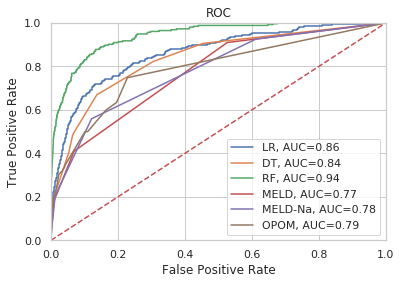

In [26]:
# Draw Comparison Graph
plt.figure(0)
plt.title('ROC')
plt.plot(fpr_lr,tpr_lr,label="LR, AUC=%0.2f" % AUC_lr)
plt.plot(fpr_dct,tpr_dct,label="DT, AUC=%0.2f" % AUC_dct)
plt.plot(fpr_rf,tpr_rf,label="RF, AUC=%0.2f" % AUC_rf)

newdf = MELDProb(X_test)
newdf['Live'] = 1-y_test

# calculating the log values
newdf['eBILT'] = np.log10(newdf['BILT'])
newdf['eCREAT'] = np.log10(newdf['CREAT'])
newdf['eINR'] = np.log10(newdf['INR'])

#MELD
y_true_meld = y_test
y_pred_meld = newdf['MELD_prob']
fpr_meld, tpr_meld, thresholds = roc_curve(y_true_meld, y_pred_meld, pos_label=1)
AUC_meld = roc_auc_score(y_true_meld, y_pred_meld)

#MELD_Na
y_true_na = np.array(y_test)
y_pred_na = np.array(newdf['MELD_Na_prob'])
fpr_meldna, tpr_meldna, thresh = roc_curve(y_true_na, y_pred_na, pos_label=1)
AUC_meldna = roc_auc_score(y_true_na, y_pred_na)

#OPOM 
y_true_opom, y_pred_opom = OPOMTree(newdf)
fpr_opom, tpr_opom, thresholds = roc_curve(y_true_opom, y_pred_opom, pos_label=1)
#roc_auc = metrics.auc(fpr, tpr)
AUC_opom = roc_auc_score(y_true_opom, y_pred_opom)

plt.plot(fpr_meld,tpr_meld,label="MELD, AUC=%0.2f" % AUC_meld)
plt.plot(fpr_meldna,tpr_meldna,label="MELD-Na, AUC=%0.2f" % AUC_meldna)
plt.plot(fpr_opom,tpr_opom,label="OPOM, AUC=%0.2f" % AUC_opom)
#
#fpr, tpr, thresholds = metrics.roc_curve(y_true, scores, pos_label=1)
#auc = metrics.roc_auc_score(y_true, scores)
#plt.plot(fpr,tpr,label="OPOM, AUC=%0.2f" % auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()